In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import plotly_express as px
from fastai.vision import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

ModuleNotFoundError: No module named 'seaborn'

In [3]:
test_path = Path('dataset_classification_final_test')
model_path = Path('dataset_classification/')

In [4]:
#load learner exported using learn.export()
learn = load_learner(model_path, test=ImageList.from_folder(test_path))

In [5]:
Prediction = namedtuple('Prediction', ['path', 'pred_idx', 'pred_class', 'probability', 'misclassified'])
def test_model_class(folder):   
    result = []    
    files_list = [files for files in folder.iterdir() if files.suffix == '.png']
    for f in files_list:
        misclass = False
        img = open_image(f)
        pred_class,pred_idx,outputs = learn.predict(img)
        if not (str(pred_class) == folder.name):
            print(f"Error! predicted class: '{pred_class}' vs actual class: '{folder.name}'")
            print("\t",f)
            misclass = True
        result.append((f, int(pred_idx), str(pred_class), outputs, misclass))
        
    return result

In [69]:
def get_results_class(folder_class):
    result = []    
    files_list = get_image_files(folder_class)
    for f in files_list:
        misclass = False
        actual_class = folder_class.name
        img = open_image(f)
        pred_class,pred_idx,outputs = learn.predict(img)
        if not (str(pred_class) == actual_class):
            print(f"Error! predicted class: '{pred_class}' vs actual class: '{actual_class}'")
            print("\t",f)
            misclass = True
# tuple legend: path, actual_class, pred_class, misclass, pred_idx, prob_all_classes        
        result.append([str(f), actual_class, str(pred_class), misclass, int(pred_idx)]+list(outputs.numpy()))
        
    return result

In [70]:
#get_results_class(test_path / 'Albicocca')

In [73]:
def get_results():
    folders_list = sorted([folders for folders in test_path.iterdir()])
    columns = ['path', 'actual_class', 'pred_class', 'misclass', 'pred_idx'] + learn.data.classes
    results = pd.DataFrame(columns=columns)
    for f in folders_list:
        result = get_results_class(f)
        result = pd.DataFrame(result, columns=columns)
        results = pd.concat((results, result), ignore_index=True)
    results.set_index('actual_class', inplace=True)
    return results

In [74]:
results = get_results()

Error! predicted class: 'Prugna rossa' vs actual class: 'Pesca'
	 dataset_classification_final_test/Pesca/Pesca_21.png
Error! predicted class: 'Prugna rossa' vs actual class: 'Pesca'
	 dataset_classification_final_test/Pesca/Pesca_87.png
Error! predicted class: 'Patata' vs actual class: 'Pesca'
	 dataset_classification_final_test/Pesca/Pesca_79.png
Error! predicted class: 'Patata' vs actual class: 'Pesca'
	 dataset_classification_final_test/Pesca/Pesca_71.png
Error! predicted class: 'Patata' vs actual class: 'Pesca'
	 dataset_classification_final_test/Pesca/Pesca_54.png


In [83]:
results.dtypes

path                    object
pred_class              object
misclass                object
pred_idx                object
Albicocca              float64
Banana                 float64
Carota                 float64
Cetriolo               float64
Champignon             float64
Ciliegia               float64
Cipolla                float64
Kiwi                   float64
Lime                   float64
Mela                   float64
Patata                 float64
Peperoncino            float64
Pera                   float64
Pesca                  float64
Prugna rossa           float64
Zucchino               float64
pomodoro_ciliegino     float64
pomodoro_sanmarzano    float64
dtype: object

In [86]:
def pred_hist(results, f_class):
    """TODO, warning use a reference to global learn object in order to get class idx"""
    result_class = results.loc[f_class]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.distplot(result_class[result_class.misclass == True][f_class], kde=False, label="Misclassified", color='red', bins=8, ax=ax)
    sns.distplot(result_class[result_class.misclass == False][f_class], kde=False, label="Correclty classified", color='blue', bins=8, ax=ax)
    plt.legend()
    plt.title('')

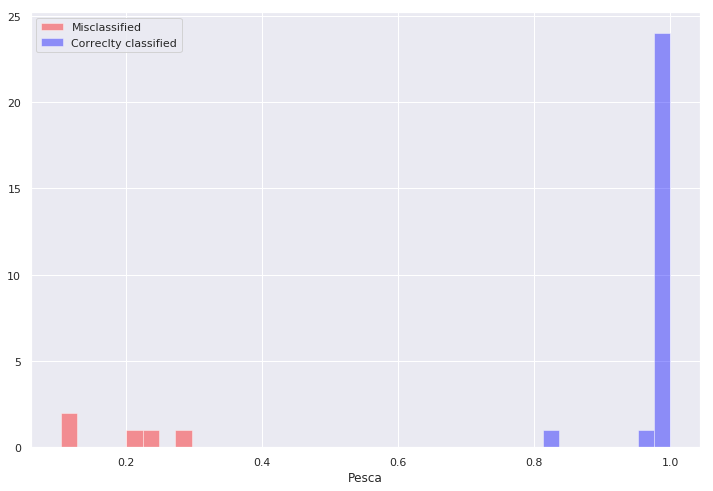

In [87]:
pred_hist(results, 'Pesca')

In [127]:
def pred_plot(results, f_class):
    result_class = results.loc[f_class]
    prob_class = result_class['Albicocca':].mean()
    sns.barplot(x=prob_class.index, y=prob_class)
    plt.xticks(rotation='vertical')
    plt.title("Mean probability for: "+f_class)

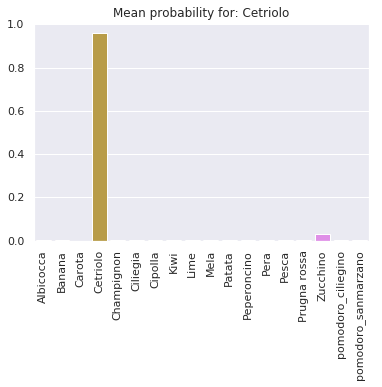

In [129]:
pred_plot(results, 'Cetriolo')

In [99]:
d = _

In [100]:
d.dtypes

dtype('float64')

In [101]:
type(d)

pandas.core.series.Series